In [ ]:
#ASCII code to print with colours

GREEN = '\033[92m\033[1m'
RED = '\033[91m'
ENDC = '\033[0m'
WARNING = '\033[1m\033[93m'

# TUTORIAL

1. Select the **"Runtime"** option from the top bar!
2. Click on **"Change runtime type"**.
3. Select the dropdown below the section **"Hardware accelerator"**, select **"GPU"** and press **"Save"**.
4. Now do ***step 1*** once again and click **"Run all"** to execute the entire code

In [ ]:
!pip install ultralytics tqdm gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.7/592.7 kB 25.1 MB/s eta 0:00:00


In [ ]:
import torch
import time
import os
from tqdm import tqdm

In [ ]:
class SmartTrafficLight:

  def __init__(self, model="yolov5s"):
    self.model = torch.hub.load('ultralytics/yolov5', model, pretrained=True)

  def counter(self, images:list):
    return self.model(images)


  @staticmethod
  def get_num_vehicles(raw_model_prediction) -> list:
    raw_model_prediction = str(raw_model_prediction)

    img_results = raw_model_prediction.splitlines()[:-1]
    fin_result = []

    for img_result in img_results:

      # Data il ninnum vendatha info kalayanam starting ile 3 values namukku veenda
      result, tot_vehi = img_result.split()[3:], 0

      for obv in result: # obv -> each line of the observation
        if ("car" in obv) or ("bus" in obv) or ("truck" in obv):
          # car-um, bus-um truck inteum ennam kandatti avaye add cheyum
          tot_vehi += int(result[result.index(obv)-1])

      fin_result.append(tot_vehi)
    return fin_result
    # Avasanam athinne oru list aayituu return cheyum. index position corresponding to the lane no.

  @staticmethod
  def road_decider(vehi_no:list) -> int:
    # Max no. of vehicles ulla rodinte no. return cheyum
    return vehi_no.index(max(vehi_no))+1

  @staticmethod
  def timer(count: int, car_w: float, car_l: float, avg_s: float, dist_: float, rod_w: float, error: int):

    rows = rod_w // car_w
    cols = count // rows

    avg_dist = dist_+ cols*car_l
    avg_time = avg_dist // avg_s + error
    avg_time = int(avg_time)

    for i in tqdm (range(avg_time), desc="Green", unit ="tick", ncols=100):
      time.sleep(1)
    print()

#Main Part

In [ ]:
junction = SmartTrafficLight() # New instance

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: Ultralytics requirement "gitpython>=3.1.30" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 180.8 MB/s eta 0:00:00

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2023-5-30 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 275MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


#Downlaoding the images from google drive

In [ ]:
import gdown

In [ ]:
if ("images" not in os.listdir()) and (os.getcwd() == "/content"):
  url = 'image_url'
  output = 'images.tgz'
  gdown.download_folder(url, quiet=False)

#Sample results

In [ ]:
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image = '/content/images/b1.jpg'

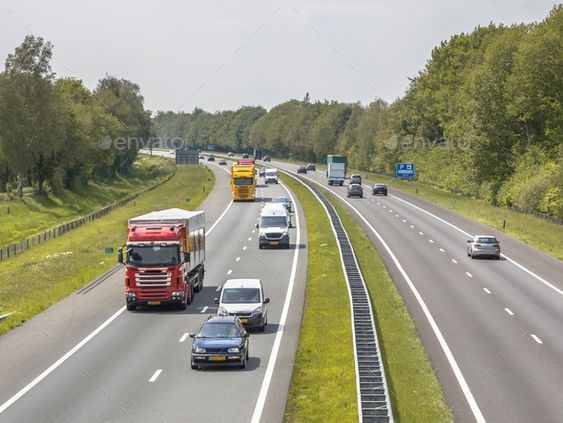

In [ ]:
ipd.Image(image)

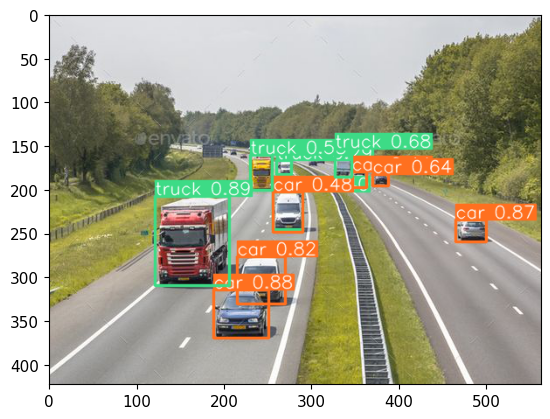

In [ ]:
results = junction.counter(image)
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

#Defining the names of the images
###In a real worl case, this will be the images from the camera

In [ ]:
imgs = [["a1.jpg","a2.jpg","a3.jpg","a4.jpg"],
        ["b1.jpg","b2.jpg","b3.jpg","b4.jpg"],
        ["c1.jpg","c2.jpg","c3.jpg","c4.jpg"],
        ["d1.jpg","d2.jpg","d3.jpg","d4.jpg"]]

#Constants
All of then are in SI units

In [ ]:
# SI UNIT
car_width = 2.0
car_length = 5.0
avg_speed = 10*5/18
distance = 15.0
road_width = 6.0
error = 2 # time

#Inference

In [ ]:
try:
  os.chdir("images")
  for img in imgs:
    pred = junction.counter(img)
    num_vehi_per_road = junction.get_num_vehicles(pred)

    give_go2 = junction.road_decider(num_vehi_per_road)

    for vehis in num_vehi_per_road:

      lane_no = num_vehi_per_road.index( vehis ) + 1
      stat = GREEN if (give_go2 == lane_no) else RED

      print(f"{stat}Road Number: {lane_no} - Vehicles: {vehis}{ENDC}")

    count = max(num_vehi_per_road)
    junction.timer(count,
                  car_width,
                  car_length,
                  avg_speed,
                  distance,
                  road_width,
                  error)
  os.chdir('/content')

except:
  os.chdir('/content')
  print(WARNING+"\n\nSTOPPED"+ENDC)


Road Number: 1 - Vehicles: 23
Road Number: 2 - Vehicles: 22
Road Number: 3 - Vehicles: 10
Road Number: 4 - Vehicles: 16


Green: 100%|██████████████████████████████████████████████████████| 20/20 [00:20<00:00,  1.00s/tick]



Road Number: 1 - Vehicles: 11
Road Number: 2 - Vehicles: 33
Road Number: 3 - Vehicles: 22
Road Number: 4 - Vehicles: 17


Green:  67%|████████████████████████████████████                  | 18/27 [00:18<00:09,  1.00s/tick]